In [146]:
# 1. Tentukan Hipotesis nol (H_0: θ = θ_0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
# 2. Pilih hipotesis alternatif H_1 salah dari dari θ > θ_0 , θ < θ_0 , atau θ ≠ θ_0.
# 3. Tentukan tingkat signifikan α.
# 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
# 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang
#    digunakan.
# 6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes
#    signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display, Markdown, Latex

df = pd.read_csv("water_potability.csv", 
                    names=["id", 
                            "pH", 
                            "Hardness", 
                            "Solids", 
                            "Chloramines", 
                            "Sulfate", 
                            "Conductivity", 
                            "OrganicCarbon", 
                            "Trihalomethanes", 
                            "Turbidity", 
                            "Potability"]
                    ).set_index("id")

## Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

### a. Nilai Rata-rata pH di atas 7?

###### Tentukan Hipotesis nol ($H_0: θ = θ_0$), dimana θ bisa berupa $\mu$, $σ^2$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).

$H_0:\mu=7$

###### Pilih hipotesis alternatif $H_1$ salah dari dari $θ > θ_0$ , $θ < θ_0$ , atau $θ ≠ θ_0$.

$H_1:\mu>7$

###### Tentukan tingkat signifikan α.

$α = 0.05$

###### Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

Daerah kritis:

In [2]:
display(Markdown(f'$t> {round(st.norm.ppf(1-0.05), 3)} $'))

$t> 1.645 $

Tes statistik:

\begin{equation}
t=\frac{\bar{x}-\mu_0}{s/\sqrt{n}}
\end{equation}

###### Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.

In [3]:
t, p = st.ttest_1samp(df['pH'], popmean=7)
p = st.norm.sf(t)

display(Markdown(f'$t={round(t,3)}$'))
display(Markdown(f'$p={round(p,3)}$'))

$t=2.485$

$p=0.006$

###### Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.

In [4]:
if (p < 0.05):
    display(Markdown(f"**Keputusan:**\n\nTolak $H_0$ karena $t={round(t,3)}>{round(st.norm.ppf(1-0.05), 3)}$"))
    display(Markdown(f"**Tes signifikan:**\n\nTolak $H_0$ karena $p={round(p,3)}<α=0.05$"))
    display(Markdown("**Jadi, pH rata-rata diatas 7**"))
else:
    display(Markdown(f"**Keputusan:**\n\nTidak menolak $H_0$ karena $t={round(t,3)}≤{round(st.norm.ppf(1-0.05), 3)}$"))
    display(Markdown(f"**Tes signifikan:**\n\nTidak menolak $H_0$ karena $p={round(p,3)}≥α=0.05$"))
    display(Markdown("**Jadi, pH rata-rata sama dengan 7**"))

**Keputusan:**

Tolak $H_0$ karena $t=2.485>1.645$

**Tes signifikan:**

Tolak $H_0$ karena $p=0.006<α=0.05$

**Jadi, pH rata-rata diatas 7**

Text(0.5, 1.0, 'pH')

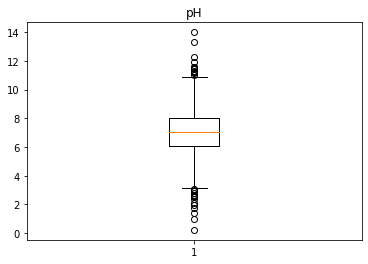

In [6]:
boxplot = plt.subplot(1,1,1)

plt.boxplot(df['pH'])
boxplot.set_title('pH')

### b. Nilai Rata-rata Hardness tidak sama dengan 205?

###### Tentukan Hipotesis nol ($H_0: θ = θ_0$), dimana θ bisa berupa $\mu$, $σ^2$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).

$H_0:\mu=205$

###### Pilih hipotesis alternatif $H_1$ salah dari dari $θ > θ_0$ , $θ < θ_0$ , atau $θ ≠ θ_0$.

$H_1:\mu≠205$

###### Tentukan tingkat signifikan α.

$α = 0.05$

###### Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

Daerah kritis:

In [7]:
display(Markdown(f'$t< -{round(st.norm.ppf(1-0.05/2), 3)}$ dan $t> {round(st.norm.ppf(1-0.05/2), 3)} $'))

$t< -1.96$ dan $t> 1.96 $

Tes statistik:

\begin{equation}
t=\frac{\bar{x}-\mu_0}{s/\sqrt{n}}
\end{equation}

###### Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.

In [8]:
t, p = st.ttest_1samp(df['Hardness'], popmean=205)

display(Markdown(f'$t={round(t,3)}$'))
display(Markdown(f'$p={round(p,3)}$'))

$t=-12.403$

$p=0.0$

###### Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.

In [10]:
if (p < 0.05):
    if (t < -1 * st.norm.ppf(1-0.05/2)):
        display(Markdown(f"**Keputusan:**\n\nTolak $H_0$ karena $t={round(t,3)}<-{round(st.norm.ppf(1-0.05/2), 3)}$"))
    else:
        display(Markdown(f"**Keputusan:**\n\nTolak $H_0$ karena $t={round(t,3)}>{round(st.norm.ppf(1-0.05/2), 3)}$"))
    display(Markdown(f"**Tes signifikan:**\n\nTolak $H_0$ karena $p={round(p,3)}<α=0.05$"))
    display(Markdown("**Jadi, Hardness rata-rata tidak sama dengan 205**"))
else:
    display(Markdown(f"**Keputusan:**\n\nTidak menolak $H_0$ karena $t={round(t,3)}$ berada pada $-{round(st.norm.ppf(1-0.05/2), 3)}≤t≤{round(st.norm.ppf(1-0.05/2), 3)}$"))
    display(Markdown(f"**Tes signifikan:**\n\nTidak menolak $H_0$ karena $p={round(p,3)}≥α=0.05$"))
    display(Markdown("**Jadi, Hardness rata-rata sama dengan 205**"))

**Keputusan:**

Tolak $H_0$ karena $t=-12.403<-1.96$

**Tes signifikan:**

Tolak $H_0$ karena $p=0.0<α=0.05$

**Jadi, Hardness rata-rata tidak sama dengan 205**

Text(0.5, 1.0, 'Hardness')

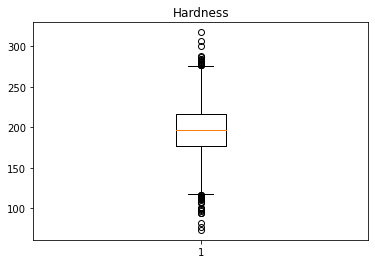

In [11]:
boxplot = plt.subplot(1,1,1)

plt.boxplot(df['Hardness'])
boxplot.set_title('Hardness')

### c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

###### Tentukan Hipotesis nol ($H_0: θ = θ_0$), dimana θ bisa berupa $\mu$, $σ^2$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).

$H_0:\mu=21900$

###### Pilih hipotesis alternatif $H_1$ salah dari dari $θ > θ_0$ , $θ < θ_0$ , atau $θ ≠ θ_0$.

$H_1:\mu≠21900$

###### Tentukan tingkat signifikan α.

$α = 0.05$

###### Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

Daerah kritis:

In [12]:
display(Markdown(f'$t< -{round(st.norm.ppf(1-0.05/2), 3)}$ dan $t> {round(st.norm.ppf(1-0.05/2), 3)} $'))

$t< -1.96$ dan $t> 1.96 $

Tes statistik:

\begin{equation}
t=\frac{\bar{x}-\mu_0}{s/\sqrt{n}}
\end{equation}

###### Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.

In [14]:
t, p = st.ttest_1samp(df['Solids'], popmean=21900)

display(Markdown(f'$t={round(t,3)}$'))
display(Markdown(f'$p={round(p,3)}$'))

$t=0.024$

$p=0.981$

###### Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.

In [18]:
if (p < 0.05):
    if (t < -1 * st.norm.ppf(1-0.05/2)):
        display(Markdown(f"**Keputusan:**\n\nTolak $H_0$ karena $t={round(t,3)}<-{round(st.norm.ppf(1-0.05/2), 3)}$"))
    else:
        display(Markdown(f"**Keputusan:**\n\nTolak $H_0$ karena $t={round(t,3)}>{round(st.norm.ppf(1-0.05/2), 3)}$"))
    display(Markdown(f"**Tes signifikan:**\n\nTolak $H_0$ karena $p={round(p,3)}<α=0.05$"))
    display(Markdown("**Jadi, 100 baris pertama Solids rata-rata tidak sama dengan 205**"))
else:
    display(Markdown(f"**Keputusan:**\n\nTidak menolak $H_0$ karena $t={round(t,3)}$ berada pada $-{round(st.norm.ppf(1-0.05/2), 3)}≤t≤{round(st.norm.ppf(1-0.05/2), 3)}$"))
    display(Markdown(f"**Tes signifikan:**\n\nTidak menolak $H_0$ karena $p={round(p,3)}≥α=0.05$"))
    display(Markdown("**Jadi, 100 baris pertama Solids rata-rata sama dengan 205**"))

**Keputusan:**

Tidak menolak $H_0$ karena $t=0.024$ berada pada $-1.96≤t≤1.96$

**Tes signifikan:**

Tidak menolak $H_0$ karena $p=0.981≥α=0.05$

**Jadi, 100 baris pertama Solids rata-rata sama dengan 205**

Text(0.5, 1.0, 'Solids')

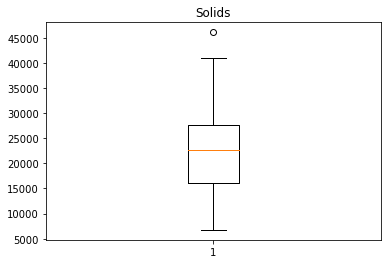

In [17]:
boxplot = plt.subplot(1,1,1)

plt.boxplot(df.iloc[:100]['Solids'])
boxplot.set_title('Solids')

### d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

###### Tentukan Hipotesis nol ($H_0: θ = θ_0$), dimana θ bisa berupa $\mu$, $σ^2$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).

$H_0:p=0.1$

###### Pilih hipotesis alternatif $H_1$ salah dari dari $θ > θ_0$ , $θ < θ_0$ , atau $θ ≠ θ_0$.

$H_1:p≠0.1$

###### Tentukan tingkat signifikan α.

$α = 0.05$

###### Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

Daerah kritis:

In [160]:
display(Markdown(f'$z< -{round(st.norm.ppf(1-0.05/2), 3)}$ dan $z> {round(st.norm.ppf(1-0.05/2), 3)} $'))

$z< -1.96$ dan $z> 1.96 $

Tes statistik:

\begin{equation}
z = \frac{\hat{p_{}} - p_{0}} {\sqrt{p_{0}q_{0}/n}}
\end{equation}

###### Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.

In [161]:
z, p = proportions_ztest(len(df[df["Conductivity"] > 450]), len(df), value=0.1, prop_var=0.1)

display(Markdown(f'$z={round(z,3)}$'))
display(Markdown(f'$p={round(p,3)}$'))

$z=40.446$

$p=0.0$

###### Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika p-value lebih kecil dibanding tingkat signifikansi $α$ yang diinginkan.

In [162]:
if ((z < -1 * st.norm.ppf(1-0.05/2) or z > st.norm.ppf(1-0.05/2)) and p < 0.05):
    if (z < -1 * st.norm.ppf(1-0.05/2)):
        display(Markdown(f"**Keputusan:**\n\nTolak $H_0$ karena $z={round(z,3)}<-{round(st.norm.ppf(1-0.05/2), 3)}$"))
    else:
        display(Markdown(f"**Keputusan:**\n\nTolak $H_0$ karena $z={round(z,3)}>{round(st.norm.ppf(1-0.05/2), 3)}$"))
    display(Markdown(f"**Tes signifikan:**\n\nTolak $H_0$ karena $p={round(p,3)}<α=0.05$"))
    display(Markdown("**Jadi, proporsi nilai Conductivity yang lebih dari 450 tidak sama dengan 10%**"))
else:
    display(Markdown(f"**Keputusan:**\n\nTidak menolak $H_0$ karena $z={round(z,3)}$ berada pada $-{round(st.norm.ppf(1-0.05/2), 3)}≤z≤{round(st.norm.ppf(1-0.05/2), 3)}$"))
    display(Markdown(f"**Tes signifikan:**\n\nTidak menolak $H_0$ karena $p={round(p,3)}≥α=0.05$"))
    display(Markdown("**Jadi, proporsi nilai Conductivity yang lebih dari 450 sama dengan 10%**"))

**Keputusan:**

Tolak $H_0$ karena $z=40.446>1.96$

**Tes signifikan:**

Tolak $H_0$ karena $p=0.0<α=0.05$

**Jadi, proporsi nilai Conductivity yang lebih dari 450 tidak sama dengan 10%**

Text(0.5, 1.0, 'Conductivity')

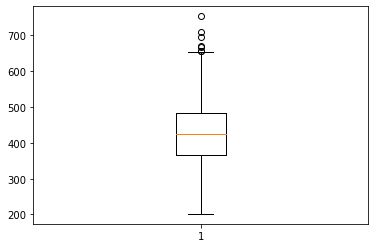

In [163]:
plt.boxplot(df['Conductivity'])
boxplot.set_title('Conductivity')

### e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

###### Tentukan Hipotesis nol ($H_0: θ = θ_0$), dimana θ bisa berupa $\mu$, $σ^2$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).

$H_0:p=0.05$

###### Pilih hipotesis alternatif $H_1$ salah dari dari $θ > θ_0$ , $θ < θ_0$ , atau $θ ≠ θ_0$.

$H_1:p<0.05$

###### Tentukan tingkat signifikan α.

$α = 0.05$

###### Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

Daerah kritis:

In [164]:
display(Markdown(f'$z< -{round(st.norm.ppf(1-0.05), 3)}$'))

$z< -1.645$

Tes statistik:

\begin{equation}
z = \frac{\hat{p_{}} - p_{0}} {\sqrt{p_{0}q_{0}/n}}
\end{equation}

###### Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.

In [165]:
z, p = proportions_ztest(len(df[df["Trihalomethanes"] < 40]), len(df), value=0.05, alternative="smaller")

display(Markdown(f'$z={round(z,3)}$'))
display(Markdown(f'$p={round(p,3)}$'))

$z=0.549$

$p=0.708$

###### Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika p-value lebih kecil dibanding tingkat signifikansi $α$ yang diinginkan.

In [166]:
if ((z < -1 * st.norm.ppf(1-0.05/2) or z > st.norm.ppf(1-0.05/2)) and p < 0.05):
    display(Markdown(f"**Keputusan:**\n\nTolak $H_0$ karena $z={round(z,3)}<-{round(st.norm.ppf(1-0.05), 3)}$"))
    display(Markdown(f"**Tes signifikan:**\n\nTolak $H_0$ karena $p={round(p,3)}<α=0.05$"))
    display(Markdown("**Jadi, proporsi nilai Trihalomethanes yang kurang dari 40 kurang dari 5%**"))
else:
    display(Markdown(f"**Keputusan:**\n\nTidak menolak $H_0$ karena $z={round(z,3)}≥-{round(st.norm.ppf(1-0.05), 3)}$"))
    display(Markdown(f"**Tes signifikan:**\n\nTidak menolak $H_0$ karena $p={round(p,3)}≥α=0.05$"))
    display(Markdown("**Jadi, proporsi nilai Trihalomethanes yang kurang dari 40 adalah 5%**"))

**Keputusan:**

Tidak menolak $H_0$ karena $z=0.549≥-1.645$

**Tes signifikan:**

Tidak menolak $H_0$ karena $p=0.708≥α=0.05$

**Jadi, proporsi nilai Trihalomethanes yang kurang dari 40 adalah 5%**

Text(0.5, 1.0, 'Trihalomethanes')

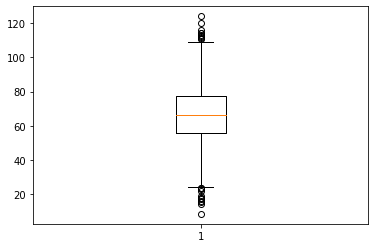

In [167]:
plt.boxplot(df['Trihalomethanes'])
boxplot.set_title('Trihalomethanes')